gdna informations https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt

mtdna informations https://www.ncbi.nlm.nih.gov/genome/browse#!/organelles/organelles.csv

In [353]:
#importing required modules
import os
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [403]:
#get nuclear genome informations
gdnas=pd.read_csv('../data/eukaryotes.txt',sep='\t',index_col=0)
gdnas.head(n=2)

,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession
#Organism/Name,,,,,,,,,,,,,,,,,,
Neopyropia yezoensis,2788,PRJNA589917,589917,Other,Other,107.591,64.8454,GCA_009829735.1,chromosome 1:CM020618.1; chromosome 2:CM020619...,WMLA01,28,-,-,2020/01/03,2020/01/06,Chromosome,Ocean University,SAMN13316713
Emiliania huxleyi CCMP1516,280463,PRJNA77753,77753,Protists,Other Protists,167.676,64.5,GCA_000372725.1,-,AHAL01,7795,38549,38554,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062


In [407]:
gdnas.loc[gdnas['BioProject ID']==33554]

,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession
#Organism/Name,,,,,,,,,,,,,,,,,,


In [257]:
#get mitochondrial genome informations
mtdnas=pd.read_csv('../data/organelles.csv',index_col=0)
mtdnas.head(n=2)

,Organism Groups,Strain,BioSample,BioProject,Size(Mb),GC%,Type,Replicons,CDS,Release Date
#Organism Name,,,,,,,,,,
(Cyprinus carpio 'mirror' x Cyprinus carpio 'singuonensis') x Carassius auratus red var.,Eukaryota;Animals;Fishes,NaN,NaN,PRJNA353408,0.016581,43.3207,mitochondrion,NC_031807.1/KU146531.1,13,2016-11-14T00:00:00Z
Aacanthocnema dobsoni,Eukaryota;Animals;Insects,NaN,NaN,PRJNA483618,0.015179,21.9382,mitochondrion,NC_038132.1/MG989216.1,13,2018-07-31T00:00:00Z


In [251]:
#get phylogenetic informations
phylo_data=pd.read_csv('../data/nodes.dmp',sep='\t',header=None)
phylo_data=phylo_data.rename(columns={
    0:'tax_id',
    4:'rank'
                          })
phylo_data.head(n=2)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tax_id,1,2,3,rank,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,|,1,|,no rank,|,NaN,|,8,|,...,0,|,0,|,0,|,0,|,NaN,|
1,2,|,131567,|,superkingdom,|,NaN,|,0,|,...,0,|,0,|,0,|,0,|,NaN,|


In [252]:
#add phylogenetic rank to gdnas based on tax_id
def add_phylo_rank(tax_id):
    try:
        rank=phylo_data.loc[phylo_data['tax_id']==tax_id]['rank'].tolist()[0]
        return rank
    except:
        return np.nan

ranks=gdnas['TaxID'].apply(add_phylo_rank)
gdnas['rank']=ranks
gdnas.head(n=2)

,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession,rank
#Organism/Name,,,,,,,,,,,,,,,,,,,
Neopyropia yezoensis,2788,PRJNA589917,589917,Other,Other,107.591,64.8454,GCA_009829735.1,chromosome 1:CM020618.1; chromosome 2:CM020619...,WMLA01,28,-,-,2020/01/03,2020/01/06,Chromosome,Ocean University,SAMN13316713,species
Emiliania huxleyi CCMP1516,280463,PRJNA77753,77753,Protists,Other Protists,167.676,64.5,GCA_000372725.1,-,AHAL01,7795,38549,38554,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062,strain


In [265]:
#function for adding mtdna size to gdnas
def get_mt_size(gdna_row):
    mtdna=mtdnas.loc[mtdnas['BioProject']==gdna_row['BioProject Accession']]
    try:
        return mtdna['Size(Mb)'].tolist()[0]
    except:
        return np.nan
    
mt_dna_sizes=gdnas.apply(get_mt_size, axis=1)

In [269]:
#add mtdna size to gdna df
gdnas['mt_dna_size(Mb)']=mt_dna_sizes
gdnas.head(n=2)

,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession,rank,mt_dna_size(Mb)
#Organism/Name,,,,,,,,,,,,,,,,,,,,
Neopyropia yezoensis,2788,PRJNA589917,589917,Other,Other,107.591,64.8454,GCA_009829735.1,chromosome 1:CM020618.1; chromosome 2:CM020619...,WMLA01,28,-,-,2020/01/03,2020/01/06,Chromosome,Ocean University,SAMN13316713,species,NaN
Emiliania huxleyi CCMP1516,280463,PRJNA77753,77753,Protists,Other Protists,167.676,64.5,GCA_000372725.1,-,AHAL01,7795,38549,38554,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062,strain,NaN


In [274]:
#drop rows where no data for genome sizes
gdnas=gdnas.dropna(subset=['Size (Mb)','mt_dna_size(Mb)'])
gdnas.head(n=2)

,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession,rank,mt_dna_size(Mb)
#Organism/Name,,,,,,,,,,,,,,,,,,,,
Medicago truncatula,3880,PRJNA702529,702529,Plants,Land Plants,430.008,33.4462,GCA_003473485.2,chromosome 1:NC_053042.1/CM010648.1; chromosom...,PSQE01,42,39589,42683,2018/09/06,2018/09/12,Chromosome,NCBI,SAMN08400029,species,0.124033
Triticum aestivum,4565,PRJNA764258,764258,Plants,Land Plants,14567.000,46.215,GCA_018294505.1,chromosome 1A:NC_057794.1/CM031178.1; chromoso...,JAGHKL01,91589,155463,142442,2021/05/06,2021/05/06,Chromosome,NCBI,SAMN16451473,species,0.452526


Text(0, 0.5, 'mtDNA size (Mb)')

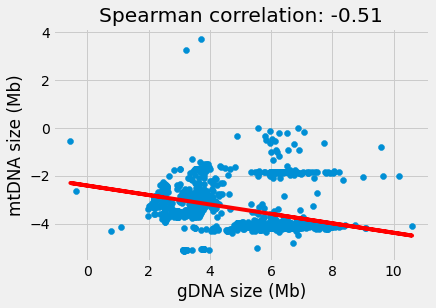

In [309]:
#calculate correlation WITHOUT genome quality control
title=scipy.stats.spearmanr(gdnas['Size (Mb)'],gdnas['mt_dna_size(Mb)'])[0]
fig,axs=plt.subplots()
axs.scatter(np.log(gdnas['Size (Mb)']),np.log(gdnas['mt_dna_size(Mb)']))
plt.title(f'Spearman correlation: {str(round(title,2))}')
m, b = np.polyfit(np.log(gdnas['Size (Mb)']),np.log(gdnas['mt_dna_size(Mb)']), 1)
axs.plot(np.log(gdnas['Size (Mb)']), m*np.log(gdnas['Size (Mb)']) + b,'r')
axs.set_xlabel('gDNA size (Mb)')
axs.set_ylabel('mtDNA size (Mb)')

In [317]:
sizes=pd.Series(gdnas['Group'].unique()).apply(lambda group: gdnas.loc[gdnas['Group']==group]['Size (Mb)'].tolist())

In [377]:
#function for getting taxonomy clustered genome sizes
def phylo_cluster(tax_unit,group):
    global gdna_sizes
    global mtdna_sizes
    gdna_sizes.append(np.median(gdnas.loc[gdnas[group]==tax_unit]['Size (Mb)']))
    mtdna_sizes.append(np.median(gdnas.loc[gdnas[group]==tax_unit]['mt_dna_size(Mb)']))

In [378]:
gdna_sizes=[]
mtdna_sizes=[]
group_genome_sizes=pd.Series(gdnas['Group'].unique()).apply(phylo_cluster,args=('Group',))
group_genome_sizes.index=gdnas['Group'].unique()
group_g_sizes=pd.Series(gdna_sizes)
group_mt_sizes=pd.Series(mtdna_sizes)
group_g_sizes

In [379]:
gdna_sizes=[]
mtdna_sizes=[]
subgroup_genome_sizes=pd.Series(gdnas['SubGroup'].unique()).apply(phylo_cluster,args=('SubGroup',))
subgroup_genome_sizes.index=gdnas['SubGroup'].unique()
subgroup_g_sizes=gdna_sizes
subgroup_mt_sizes=mtdna_sizes

In [392]:
rank_g_sizes=pd.Series(gdnas['rank'].unique()).apply(
    lambda rank: gdnas.loc[gdnas['rank']==rank]['Size (Mb)'].tolist())
rank_g_sizes.index=gdnas['rank'].unique()

rank_mt_sizes=pd.Series(gdnas['rank'].unique()).apply(
    lambda rank: gdnas.loc[gdnas['rank']==rank]['mt_dna_size(Mb)'].tolist())
rank_mt_sizes.index=gdnas['rank'].unique()

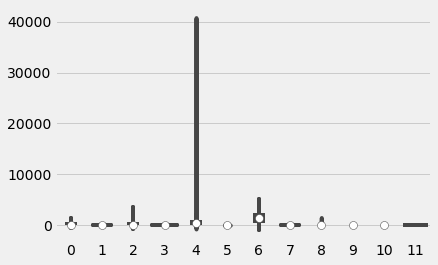

In [400]:
data=[
    group_g_sizes,group_mt_sizes,
    subgroup_g_sizes,subgroup_mt_sizes,
    rank_g_sizes['species'],rank_mt_sizes['species'],
    rank_g_sizes['subspecies'],rank_mt_sizes['subspecies'],
    rank_g_sizes['varietas'],rank_mt_sizes['varietas'],
    rank_g_sizes['forma'],rank_mt_sizes['forma']
]
fig,axs=plt.subplots()
axs=sns.violinplot(data=data)

<AxesSubplot:>

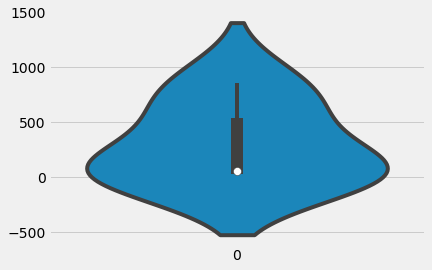

In [401]:
sns.violinplot(data=group_g_sizes)

In [402]:
group_g_sizes

[535.679, 30.7439, 857.8975, 24.3254, 59.55095]